In [1]:
import os
path = os.getcwd()
path = path.split('interactions', 1)[0] + 'interactions'
print(path)

/home/julia/Desktop/uni/enhancer-promoter-interactions


In [2]:
import pandas as pd

bed = pd.read_csv(path+'/results/calderon/links_calderon.bedpe', delimiter='\t', header=None)
bed.columns = ['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2', 'x', 'score', 'y', 'z', 'color']
print(bed.shape)
print(bed['chr1'].unique())
bed.head(10)

bed['x'].replace('.', 0, inplace=True)
bed['y'].replace('.', 0, inplace=True)
bed['z'].replace('.', 0, inplace=True)
print(sum(bed['x']), sum(bed['y']), sum(bed['z']))
bed.drop(['x', 'y', 'z'], axis=1, inplace=True)
cicero_conns = bed.copy()
sum(cicero_conns['chr1'] != cicero_conns['chr2'])
cicero_conns = cicero_conns.drop('chr2', axis=1)
cicero_conns = cicero_conns.rename(columns={'chr1': 'chr'})
cicero_conns['chr'] = cicero_conns['chr'].apply(lambda x: x[3:])
#cicero_conns.to_csv(path+'/results/whole_data/cicero_conns.csv')
cicero_conns.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/julia/Desktop/uni/enhancer-promoter-interactions/results/calderon/links_calderon.bedpe'

In [108]:
max(cicero_conns['start1'] - cicero_conns['end2'])

99991

In [3]:
chromatin_loops = pd.read_csv(path+'/data/muszka/long_and_short_range_loops_D_mel.tsv')
chromatin_loops.head()

,chr1,x1,x2,chr2,y1,y2,color,x,y,own_loop_no,...,Dmel_OregonR_WT_14-16h_Glia,Dmel_OregonR_WT_14-16h_Neuroblasts,Dmel_OregonR_WT_14-16h_Neurons,Dmel_OregonR_WT_10-12h_Neurons,Dmel_OregonR_WT_10-12h_Neuroblasts,Dmel_OregonR_WT_10-12h_Glia,Dmel_OregonR_WT_6-8h_Neurons,Dmel_OregonR_WT_6-8h_Glia,Dmel_OregonR_WT_6-8h_Neuroblasts,Dmel_w1118_WT_larva_brain
0,2L,395670,395790,2L,17260794,17260893,"85,107,47",0.395730,17.260844,NaN,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2L,395670,395790,2L,17328015,17328118,"85,107,47",0.395730,17.328066,NaN,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2L,918896,918995,2L,2595491,2595585,"85,107,47",0.918945,2.595538,NaN,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2L,921771,922766,2L,2612166,2612266,"85,107,47",0.922269,2.612216,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2L,921771,922766,2L,2677575,2677786,"85,107,47",0.922269,2.677681,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
chromatin_loops_cols = [col for col in chromatin_loops.columns if '6-8h' in col]
print(chromatin_loops_cols)

['Dmel_OregonR_WT_6-8h_Neurons', 'Dmel_OregonR_WT_6-8h_Glia', 'Dmel_OregonR_WT_6-8h_Neuroblasts']


In [5]:
chromatin_loops=chromatin_loops[['chr1', 'x1', 'x2', 'y1', 'y2', 'loop_id']+chromatin_loops_cols].copy()
chromatin_loops.rename(columns={'chr1': 'chr', 'x1': 'start1', 'x2': 'end1', 'y1': 'start2', 'y2': 'end2'}, inplace=True)
chromatin_loops.head(10)

,chr,start1,end1,start2,end2,loop_id,Dmel_OregonR_WT_6-8h_Neurons,Dmel_OregonR_WT_6-8h_Glia,Dmel_OregonR_WT_6-8h_Neuroblasts
0,2L,395670,395790,17260794,17260893,L1,1.0,0.0,0.0
1,2L,395670,395790,17328015,17328118,L2,1.0,0.0,0.0
2,2L,918896,918995,2595491,2595585,L4,0.0,0.0,0.0
3,2L,921771,922766,2612166,2612266,L5,1.0,1.0,1.0
4,2L,921771,922766,2677575,2677786,L6,1.0,1.0,1.0
5,2L,1080470,1085470,1099460,1105170,neurons14,0.0,0.0,0.0
6,2L,1252000,1261000,1341000,1352000,L69,0.0,1.0,0.0
7,2L,1416000,1428000,1456000,1467000,L70,1.0,0.0,1.0
8,2L,1615210,1620490,1647980,1652790,neurons14,0.0,0.0,0.0
9,2L,1953230,1956920,1969270,1971540,NB10,1.0,0.0,1.0


In [6]:
range_extend = range(0,600,50)
for extend in range_extend:
    for col in ['start1', 'start2']:
        chromatin_loops.loc[:,'range_'+str(extend)+'_'+ col] = chromatin_loops.loc[:,col].apply(lambda x: max(0, x - extend))

    for col in ['end1', 'end2']:
        chromatin_loops.loc[:,'range_'+str(extend)+'_'+ col] = chromatin_loops.loc[:,col] + extend

chromatin_loops.head()

,chr,start1,end1,start2,end2,loop_id,Dmel_OregonR_WT_6-8h_Neurons,Dmel_OregonR_WT_6-8h_Glia,Dmel_OregonR_WT_6-8h_Neuroblasts,range_0_start1,...,range_450_end1,range_450_end2,range_500_start1,range_500_start2,range_500_end1,range_500_end2,range_550_start1,range_550_start2,range_550_end1,range_550_end2
0,2L,395670,395790,17260794,17260893,L1,1.0,0.0,0.0,395670,...,396240,17261343,395170,17260294,396290,17261393,395120,17260244,396340,17261443
1,2L,395670,395790,17328015,17328118,L2,1.0,0.0,0.0,395670,...,396240,17328568,395170,17327515,396290,17328618,395120,17327465,396340,17328668
2,2L,918896,918995,2595491,2595585,L4,0.0,0.0,0.0,918896,...,919445,2596035,918396,2594991,919495,2596085,918346,2594941,919545,2596135
3,2L,921771,922766,2612166,2612266,L5,1.0,1.0,1.0,921771,...,923216,2612716,921271,2611666,923266,2612766,921221,2611616,923316,2612816
4,2L,921771,922766,2677575,2677786,L6,1.0,1.0,1.0,921771,...,923216,2678236,921271,2677075,923266,2678286,921221,2677025,923316,2678336


In [13]:
#change type to int
chromatin_loops[['start1', 'start2', 'end1', 'end2']] = chromatin_loops[['start1', 'start2', 'end1', 'end2']].astype(int)
cicero_conns[['start1', 'end1', 'start2', 'end2']] = cicero_conns[['start1', 'end1', 'start2', 'end2']].astype(int)

In [114]:
def intersect_intervals(interval1, interval2):
    inter_start = max(interval1[0], interval2[0])
    inter_end = min(interval1[1], interval2[1])
    if inter_start <= inter_end:
        return [inter_start, inter_end]
    else:
        return False

In [116]:
results = {}
for extend in range_extend:
    print(extend)

    results[str(extend)] = {'chr': [], 'intersection1': [], 
                                    'intersection2': [],
                                    'cicero1': [], 'cicero2': [], 
                                    'loop1': [], 'loop2': [], 
                                    'cicero_index': [], 'loop_index': [],
                                    'score': []}

    for chrom in set(cicero_conns['chr']).intersection(set(chromatin_loops['chr'])):
        cicero = cicero_conns[cicero_conns['chr'] == chrom].copy()
        loops = chromatin_loops[chromatin_loops['chr'] == chrom].copy()
        print(chrom)
        cicero['interval1'] = [list(x) for x in zip(cicero['start1'], cicero['end1'])]
        cicero['interval2'] = [list(x) for x in zip(cicero['start2'], cicero['end2'])]

        for l in loops.index:
            loop = loops.loc[l]
            loop_1 = [loop['range_'+str(extend)+'_start1'], loop['range_'+str(extend)+'_end1']]
            loop_2 = [loop['range_'+str(extend)+'_start2'], loop['range_'+str(extend)+'_end2']]
            finds1 = cicero[cicero['interval1'].apply(lambda x: intersect_intervals(x, loop_1))!=False]
            finds2 = finds1[finds1['interval2'].apply(lambda x: intersect_intervals(x, loop_2))!=False]
            if finds2.shape[0] != 0: 
                for find in finds2.index:
                    results[str(extend)]['chr'].append(chrom)
                    results[str(extend)]['cicero1'].append(finds2.loc[find, 'interval1'])
                    results[str(extend)]['cicero2'].append(finds2.loc[find, 'interval2'])
                    results[str(extend)]['intersection1'].append(intersect_intervals(finds2.loc[find, 'interval1'], loop_1))
                    results[str(extend)]['intersection2'].append(intersect_intervals(finds2.loc[find, 'interval2'], loop_2))
                    results[str(extend)]['loop1'].append(loop_1)
                    results[str(extend)]['loop2'].append(loop_2)
                    results[str(extend)]['cicero_index'].append(find)
                    results[str(extend)]['loop_index'].append(l)
                    results[str(extend)]['score'].append(finds2.loc[find, 'score'])

0
2R
2L
3L
3R
X
4
50
2R
2L
3L
3R
X
4
100
2R
2L
3L
3R
X
4
150
2R
2L
3L
3R
X
4
200
2R
2L
3L
3R
X
4
250
2R
2L
3L
3R
X
4
300
2R
2L
3L
3R
X
4
350
2R
2L
3L
3R
X
4
400
2R
2L
3L
3R
X
4
450
2R
2L
3L
3R
X
4
500
2R
2L
3L
3R
X
4
550
2R
2L
3L
3R
X
4


In [14]:
import pickle

# with open(path+'/results/calderon/summary_intersection_0_600_50_ranges.pickle', 'wb') as handle:
#     pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(path+'/results/calderon/summary_intersection_0_600_50_ranges.pickle', 'rb') as handle:
    results = pickle.load(handle)

#print(results == b)

In [8]:
print(pd.DataFrame(results))

                                                               0  \
chr            [2R, 2R, 2R, 2R, 2R, 2R, 2R, 2R, 2R, 2R, 2R, 2...   
intersection1  [[6571036, 6571219], [6571036, 6571219], [6571...   
intersection2  [[6610322, 6611389], [6611999, 6612173], [6612...   
cicero1        [[6571036, 6571219], [6571036, 6571219], [6571...   
cicero2        [[6610322, 6611389], [6611999, 6612173], [6612...   
loop1          [[6571000, 6581000], [6571000, 6581000], [6571...   
loop2          [[6608000, 6616000], [6608000, 6616000], [6608...   
cicero_index   [5426688, 5426689, 5426690, 5426691, 5426692, ...   
loop_index     [110, 110, 110, 110, 110, 110, 110, 110, 110, ...   
score          [-0.0909293086443752, 0.0030030163715116, 0.00...   

                                                              50  \
chr            [2R, 2R, 2R, 2R, 2R, 2R, 2R, 2R, 2R, 2R, 2R, 2...   
intersection1  [[6571036, 6571219], [6571036, 6571219], [6571...   
intersection2  [[6610322, 6611389], [6611999, 6

In [9]:
#save results
results = pd.DataFrame(results)
#results.to_csv(path+'/results/calderon/intersections_cicero_chromatin_loops_range_ext'+ str(range_extend)+ '.csv')


In [105]:
check = pd.read_csv(path+'/results/calderon/intersections_cicero_chromatin_loops_range_ext100.csv', index_col=0)
check.head(5)

,chr,intersection1,intersection2,cicero1,cicero2,loop1,loop2,cicero_index,loop_index,score
0,3R,"[5019534, 5019719]","[5082900, 5083505]","[5019534, 5019719]","[5082780, 5083505]","[5018900, 5025100]","[5082900, 5090100]",12380517,254,-0.024466
1,3R,"[5019534, 5019719]","[5084378, 5085036]","[5019534, 5019719]","[5084378, 5085036]","[5018900, 5025100]","[5082900, 5090100]",12380518,254,-0.011215
2,3R,"[5019534, 5019719]","[5085311, 5085528]","[5019534, 5019719]","[5085311, 5085528]","[5018900, 5025100]","[5082900, 5090100]",12380519,254,-0.006430
3,3R,"[5019534, 5019719]","[5085665, 5086055]","[5019534, 5019719]","[5085665, 5086055]","[5018900, 5025100]","[5082900, 5090100]",12380520,254,-0.038439
4,3R,"[5019534, 5019719]","[5086596, 5086911]","[5019534, 5019719]","[5086596, 5086911]","[5018900, 5025100]","[5082900, 5090100]",12380521,254,-0.148998


In [15]:
cols_to_str = ['loop1', 'loop2', 'cicero1', 'cicero2', 'intersection1', 'intersection2']
for extend in range_extend:   
    for col in cols_to_str:
        results[str(extend)][col] = [str(element) for element in results[str(extend)][col]]

In [16]:
for extend in range_extend:
    results[str(extend)] = pd.DataFrame(results[str(extend)])

In [17]:
for extend in range_extend:
    chromatin_loops['cicero_found_'+ str(extend)] = False
    chromatin_loops['score_'+str(extend)] = 0
    for row in chromatin_loops.index:
        row_chr = chromatin_loops.loc[row, 'chr']
        row_anchor1 = str([chromatin_loops.loc[row, 'range_'+str(extend)+'_start1'], chromatin_loops.loc[row, 'range_'+str(extend)+'_end1']])
        row_anchor2 = str([chromatin_loops.loc[row, 'range_'+str(extend)+'_start2'], chromatin_loops.loc[row, 'range_'+str(extend)+'_end2']])
        found = results[str(extend)][(results[str(extend)]['chr'] == row_chr) & (results[str(extend)]['loop1'] == row_anchor1) & (results[str(extend)]['loop2'] == row_anchor2)]
        if found.shape[0] != 0:
            chromatin_loops.loc[row, 'cicero_found_'+str(extend)] = True
            chromatin_loops.loc[row, 'score_'+str(extend)] = found[abs(found['score'])== max(abs(found['score']))]['score'].values[0]

In [18]:
for extend in range_extend:
    chromatin_loops['cicero_found_'+ str(extend)] = chromatin_loops['cicero_found_'+ str(extend)].astype(int)


In [19]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

chromatin_loops['6-8h_sum'] = chromatin_loops[chromatin_loops_cols[0]].astype(bool) | chromatin_loops[chromatin_loops_cols[1]].astype(bool) | chromatin_loops[chromatin_loops_cols[2]].astype(bool)
chromatin_loops['6-8h_sum'] = chromatin_loops['6-8h_sum'].astype(int)

auc_roc_neurons = []
auc_roc_neuroblasts = []
auc_roc_glia = []
auc_roc_sum = []

for extend in range_extend:
    col = 'Dmel_OregonR_WT_6-8h_Neurons'
    data = chromatin_loops[~chromatin_loops[col].isna()].copy()
    auc_roc_neurons.append(metrics.roc_auc_score(data[col], data['score_'+str(extend)]))

    col = 'Dmel_OregonR_WT_6-8h_Neuroblasts'
    data = chromatin_loops[~chromatin_loops[col].isna()].copy()
    auc_roc_neuroblasts.append(metrics.roc_auc_score(data[col], data['score_'+str(extend)]))

    col = 'Dmel_OregonR_WT_6-8h_Glia'
    data = chromatin_loops[~chromatin_loops[col].isna()].copy()
    auc_roc_glia.append(metrics.roc_auc_score(data[col], data['score_'+str(extend)]))
    
    col = '6-8h_sum'
    data = chromatin_loops[~chromatin_loops[col].isna()].copy()
    auc_roc_sum.append(metrics.roc_auc_score(data[col], data['score_'+str(extend)]))


In [22]:
print(auc_roc_neurons[1])
print(auc_roc_glia[1])
print(auc_roc_neuroblasts[1])

0.5825376725338737
0.5540786827551534
0.6593967674308514


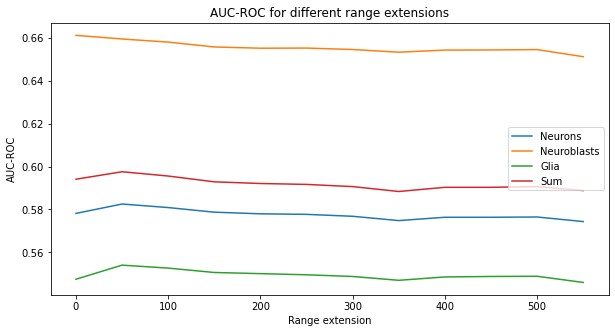

In [126]:
#plot auc_roc
plt.figure(figsize=(10, 5))
plt.plot(range_extend, auc_roc_neurons, label='Neurons')
plt.plot(range_extend, auc_roc_neuroblasts, label='Neuroblasts')
plt.plot(range_extend, auc_roc_glia, label='Glia')
plt.plot(range_extend, auc_roc_sum, label='Sum')
plt.xlabel('Range extension')
plt.ylabel('AUC-ROC')
plt.title('AUC-ROC for different range extensions')
plt.legend()

Dmel_OregonR_WT_6-8h_Neurons
[[109 156]
 [ 66  83]]
Roc-auc score 0.5594656198556414


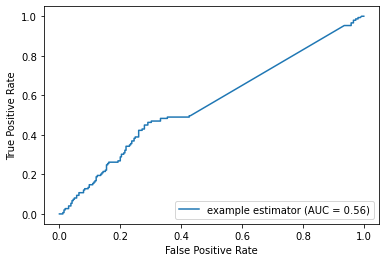

Dmel_OregonR_WT_6-8h_Glia
[[131 181]
 [ 44  58]]
Roc-auc score 0.5385558069381599


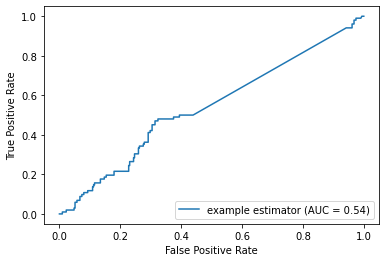

Dmel_OregonR_WT_6-8h_Neuroblasts
[[138 180]
 [ 34  59]]
Roc-auc score 0.6394468113883816


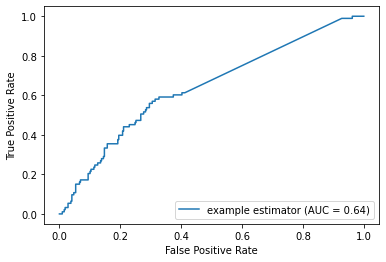

In [116]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

for col in chromatin_loops_cols:
    print(col)
    data = chromatin_loops[~chromatin_loops[col].isna()].copy()
    print(metrics.confusion_matrix(data[col], data['cicero_found']))
    print('Roc-auc score',metrics.roc_auc_score(data[col], data['score']))

    y = data[col]
    pred = data['score']
    fpr, tpr, thresholds = metrics.roc_curve(y, pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
    display.plot()
    plt.show()

### Calculating prediction power for sum of 3 cell types in timepoint 6-8h

In [117]:
chromatin_loops['6-8h_sum'] = chromatin_loops[chromatin_loops_cols[0]].astype(bool) | chromatin_loops[chromatin_loops_cols[1]].astype(bool) | chromatin_loops[chromatin_loops_cols[2]].astype(bool)
chromatin_loops['6-8h_sum'] = chromatin_loops['6-8h_sum'].astype(int)
chromatin_loops.head(10)


,chr,start1,end1,start2,end2,loop_id,Dmel_OregonR_WT_6-8h_Neurons,Dmel_OregonR_WT_6-8h_Glia,Dmel_OregonR_WT_6-8h_Neuroblasts,range_start1,range_start2,range_end1,range_end2,cicero_found,score,6-8h_sum
0,2L,395670,395790,17260794,17260893,L1,1.0,0.0,0.0,390670,17255794,400790,17265893,0,0.000000,1
1,2L,395670,395790,17328015,17328118,L2,1.0,0.0,0.0,390670,17323015,400790,17333118,0,0.000000,1
2,2L,918896,918995,2595491,2595585,L4,0.0,0.0,0.0,913896,2590491,923995,2600585,0,0.000000,0
3,2L,921771,922766,2612166,2612266,L5,1.0,1.0,1.0,916771,2607166,927766,2617266,0,0.000000,1
4,2L,921771,922766,2677575,2677786,L6,1.0,1.0,1.0,916771,2672575,927766,2682786,0,0.000000,1
5,2L,1080470,1085470,1099460,1105170,neurons14,0.0,0.0,0.0,1075470,1094460,1090470,1110170,1,-0.096586,0
6,2L,1252000,1261000,1341000,1352000,L69,0.0,1.0,0.0,1247000,1336000,1266000,1357000,1,0.027093,1
7,2L,1416000,1428000,1456000,1467000,L70,1.0,0.0,1.0,1411000,1451000,1433000,1472000,1,0.720821,1
8,2L,1615210,1620490,1647980,1652790,neurons14,0.0,0.0,0.0,1610210,1642980,1625490,1657790,1,0.465928,0
9,2L,1953230,1956920,1969270,1971540,NB10,1.0,0.0,1.0,1948230,1964270,1961920,1976540,1,0.331905,1


6-8h_sum
[[ 98 141]
 [ 80  98]]
Roc-auc score 0.5721757322175733


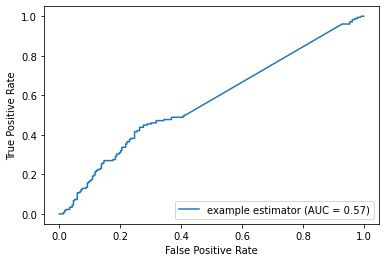

: 

In [118]:
col = '6-8h_sum'
print(col)
data = chromatin_loops[~chromatin_loops[col].isna()].copy()
print(metrics.confusion_matrix(data[col], data['cicero_found']))
print('Roc-auc score',metrics.roc_auc_score(data[col], data['score']))

y = data[col]
pred = data['score']
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                            estimator_name='example estimator')
display.plot()
plt.show()

### Read rds with cell types

In [131]:
import pyreadr
# Read the file
annot = pyreadr.read_r(path + '/data/muszka/calderon_data/atac_meta.rds')
annot = annot[None]
annot.head()


,cell,doublet_score,exp,time,sample,seurat_clusters,lasso_age,NNv1_age,lasso_time.new,NNv1_time.new,seurat_clusters.predtime,refined_annotation
rownames,,,,,,,,,,,,
CTATGGTTCGTTCCATTCTTTCTCATTGCCCTCTGCGATC,CTATGGTTCGTTCCATTCTTTCTCATTGCCCTCTGCGATC,0.802721,exp1,03-07,exp1_hrs03-07_b1,7,-3.110988,1.690188,00-02,00-02,3,Blastoderm
AGATAATTCCTTCCATTCTTAGTCGCGTCGAAGTTCGCTG,AGATAATTCCTTCCATTCTTAGTCGCGTCGAAGTTCGCTG,0.700680,exp1,03-07,exp1_hrs03-07_b1,6,-1.039036,1.330054,00-02,00-02,1,Blastoderm
TCCTCTTAACCTAGCTTCTTGTAGTAGTCCTGATTCTCGT,TCCTCTTAACCTAGCTTCTTGTAGTAGTCCTGATTCTCGT,0.505102,exp1,03-07,exp1_hrs03-07_b1,1,-3.924070,1.984080,00-02,00-02,1,Blastoderm
ACGGCAAGCAATATCTTCCGGAGCTCAGCCCCTACTCAAC,ACGGCAAGCAATATCTTCCGGAGCTCAGCCCCTACTCAAC,0.653061,exp1,03-07,exp1_hrs03-07_b1,1,2.537512,1.861791,02-04,00-02,2,Blastoderm
AACTTACGCTCATTCTGATGCCAATTCCATGTCGTTCGCC,AACTTACGCTCATTCTGATGCCAATTCCATGTCGTTCGCC,0.671769,exp1,03-07,exp1_hrs03-07_b1,1,-1.401258,1.801240,00-02,00-02,2,Blastoderm


In [130]:
print(annot.shape)
print(len(set(annot['cell'])))
## column cell has unique values

(976456, 12)
976456


In [46]:
print(set(annot['refined_annotation']))

{'Endoderm anlage', 'Tracheal system', 'Blastoderm', 'Proventriculus', 'Muscle prim.', 'Mesoderm anlage', 'PNS & sense', 'Malpighian tubule', 'Head ectoderm prim.', 'Ventral midline', 'Epidermis prim.', 'Germ cell', 'Hindgut prim.', 'Unknown', 'Plasmatocytes', 'Mesectoderm anlage', 'Ventral nerve cord', 'Neural', 'Head ectoderm', 'Brain', 'Salivary gland', 'Ectoderm anlage', 'Somatic muscle', 'Ventral nerve cord prim.', 'Pharnyx', 'Glia', 'Yolk', 'Midgut prim.', 'Hindgut', 'Visceral muscle', 'Fat body', 'Foregut prim.', 'Tracheal system prim.', 'Amnioserosa anlage', 'Amnioserosa', 'Epidermis', 'Midgut', 'Brain prim.'}
